##                      What factors made people more likely to survive in Titanic

In [3]:
import pandas as pd

### Reading our Dataset

In [4]:
titanic_data= pd.read_csv('titanic-data.csv')

First we want to take a look at our data. Looking at data gives us the variable in our dataset.We came to know that our 'Survived' class is to be predicted. we try to make intuitive guess about what factor might have influenced survival of different passangers.

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


we want to take a look at some simple statistic of our dataset.it will give a general intuition about which gender survived more or which gender were more from higher class or what were average age of passengers or on average how many relatives a person had and from which port had maximum embarked passangers. 

In [7]:
titanic_data.isnull().describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,891,891,891,891,891,891,891
unique,1,1,1,1,1,2,1,1,1,1,2,2
top,False,False,False,False,False,False,False,False,False,False,True,False
freq,891,891,891,891,891,714,891,891,891,891,687,889


In [50]:
titanic_data.groupby('Sex')[['Survived','Age','SibSp','Parch','Fare']].describe()

Survived         Age       SibSp       Parch        Fare
Sex                                                                     
female count  314.000000  261.000000  314.000000  314.000000  314.000000
       mean     0.742038   27.915709    0.694268    0.649682   44.479818
       std      0.438211   14.110146    1.156520    1.022846   57.997698
       min      0.000000    0.750000    0.000000    0.000000    6.750000
       25%      0.000000   18.000000    0.000000    0.000000   12.071875
       50%      1.000000   27.000000    0.000000    0.000000   23.000000
       75%      1.000000   37.000000    1.000000    1.000000   55.000000
       max      1.000000   63.000000    8.000000    6.000000  512.329200
male   count  577.000000  453.000000  577.000000  577.000000  577.000000
       mean     0.188908   30.726645    0.429809    0.235702   25.523893
       std      0.391775   14.678201    1.061811    0.612294   43.138263
       min      0.000000    0.420000    0.000000    0.000000    0.000000
       25%      0.000000   21.000000    0.000000    0.000000    7.895800
       50%      0.000000   29.000000    0.000000    0.000000   10.500000
       75%      0.000000   39.000000    0.000000    0.000000   26.550000
       max      1.000000   80.000000    8.000000    5.000000  512.329200

In [59]:
titanic_data.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


we see that more number of 'C' embarked passsangers survided. we note that they payed higher fare, so they were of higher class. higher class people had more resources and they were rescued first.so they had higher survival chance.

In [32]:
%matplotlib inline
from matplotlib import pyplot as plt

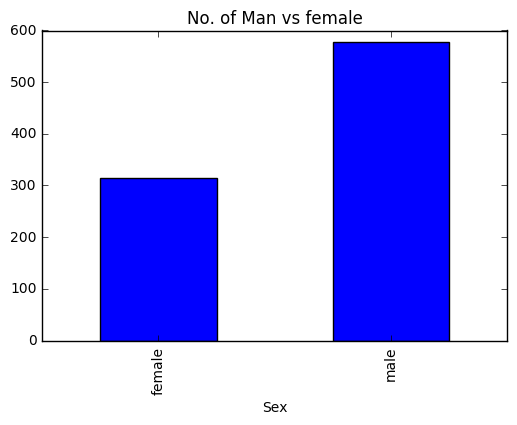

In [42]:
titanic_data.groupby('Sex')[['Survived','Age','SibSp','Parch','Fare']].count()['Survived'].plot(kind='bar')
plt.title('No. of Man vs female')

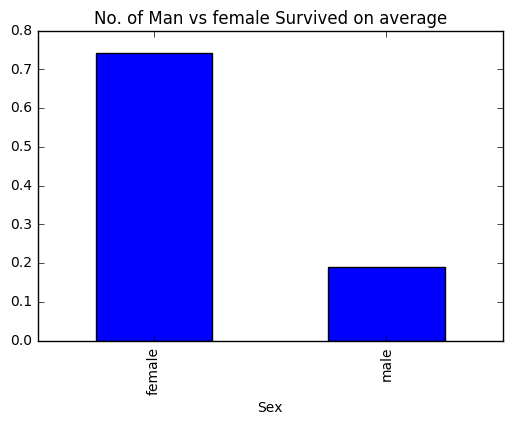

In [41]:
titanic_data.groupby('Sex')[['Survived','Age','SibSp','Parch','Fare']].mean()['Survived'].plot(kind='bar')
plt.title('No. of Man vs female Survived on average')

## which gender was more likely to survive

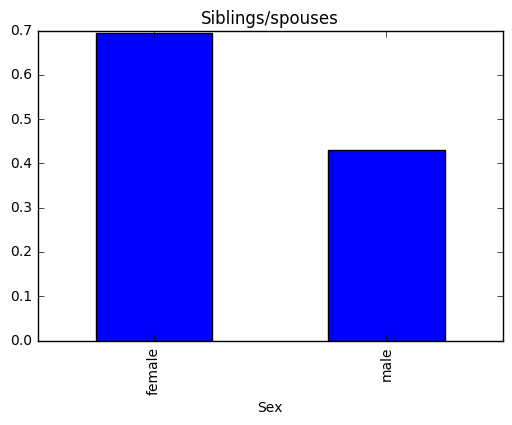

In [44]:
titanic_data.groupby('Sex')[['Survived','Age','SibSp','Parch','Fare']].mean()['SibSp'].plot(kind='bar')
plt.title('Siblings/spouses')

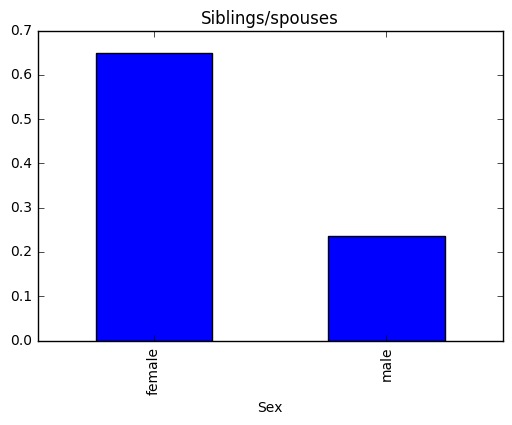

In [45]:
titanic_data.groupby('Sex')[['Survived','Age','SibSp','Parch','Fare']].mean()['Parch'].plot(kind='bar')
plt.title('parent/children')

In [48]:
titanic_data.groupby('Sex')[['Survived','Age','SibSp','Parch','Fare']].describe()['Fare']

Sex          
female  count    314.000000
        mean      44.479818
        std       57.997698
        min        6.750000
        25%       12.071875
        50%       23.000000
        75%       55.000000
        max      512.329200
male    count    577.000000
        mean      25.523893
        std       43.138263
        min        0.000000
        25%        7.895800
        50%       10.500000
        75%       26.550000
        max      512.329200
Name: Fare, dtype: float64

### were young people more adventureous? Age distribution of passangers

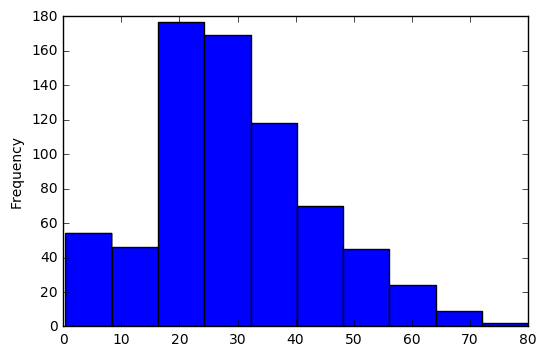

In [107]:
titanic_data['Age'].plot(kind='hist')

## Alone or with Family?

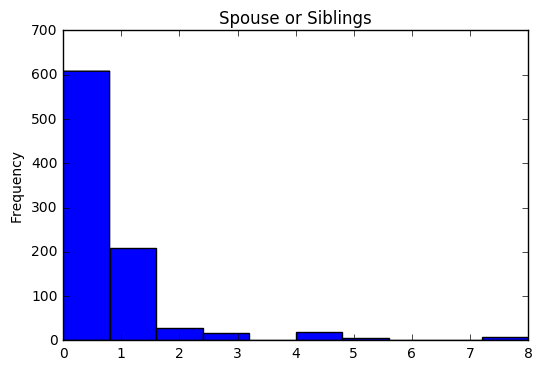

In [109]:
titanic_data['SibSp'].plot(kind='hist')
plt.title('Spouse or Siblings')

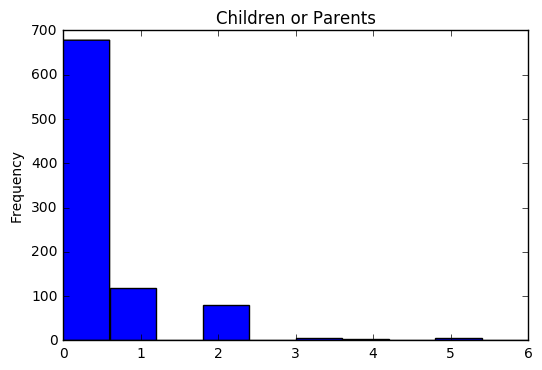

In [108]:
titanic_data['Parch'].plot(kind='hist')
plt.title('Children or Parents')

## Only wealthy people travelled? Fare Distribution

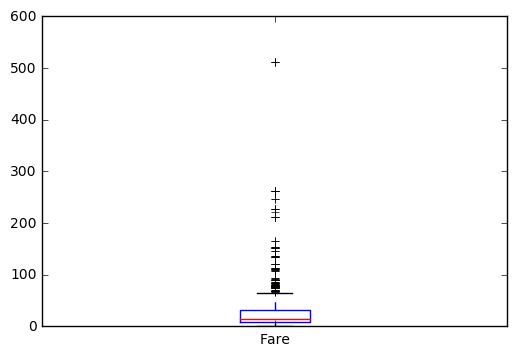

In [103]:
titanic_data['Fare'].plot(kind='box')

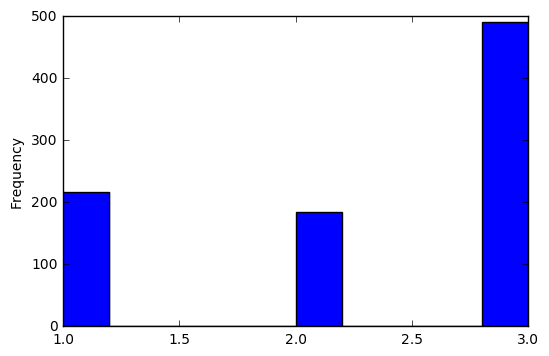

In [105]:
titanic_data['Pclass'].plot(kind='hist')

### Age factor

we want to look chances of survivel depending on age.


In [69]:
titanic_data[titanic_data['Age']>5]['Survived'].mean()

0.38656716417910447

In [70]:
titanic_data[titanic_data['Age']<5]['Survived'].mean()

0.67500000000000004

In [75]:
titanic_data[titanic_data['Age']>65]['Survived'].mean()

0.125

In [82]:
titanic_data[(titanic_data['Age']>20) & (titanic_data['Age']<40)]['Survived'].mean()

0.39516129032258063

we see that more childen survived on average and chances of survival of old age people is low. but survival rate of .39 for young age people is counter intuitive but for this reason may be that they were held till last.it seems logical that only young age male would have been left last. let's check it out.

In [84]:
titanic_data[(titanic_data['Age']>20) & (titanic_data['Age']<40)].groupby('Sex')['Survived'].mean()

Sex
female    0.784615
male      0.185950
Name: Survived, dtype: float64

this table validates our assumption.

## These are tentative findings. i will further explore it later.